In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from components import *

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [2]:
BATCH_SIZE = 128
INPUT_SIZE = Generator.INPUT_SIZE
K_STEPS = 2
dataloader = get_data_loader(train=True, batch_size=BATCH_SIZE)

In [3]:
def discriminator_loss(D_x: torch.Tensor, D_G_z: torch.Tensor):
    loss = torch.log(D_x) + torch.log(1 - D_G_z)
    return -torch.mean(loss)

def generator_loss(D_G_z: torch.Tensor):
    return -torch.mean(torch.log(D_G_z))
    #return torch.mean(torch.log(1 - D_G_z))

In [4]:
netG = Generator().to(device)
netD = Discriminator().to(device)
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

G_losses, D_losses = [], []
fake_img_list = []

In [5]:
def train(num_epochs = 1):
    for epoch in range(num_epochs):
        print('   EPOCH: ', epoch)
        for i, data in enumerate(dataloader, 0):
            # ===========TRAIN_DISCRIMINSTOR============
            netD.zero_grad()
            data_real = data[0].to(device)
            output_real = netD(data_real).view(-1)
            D_x = output_real.mean().item()

            noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)
            data_fake = netG(noise)
            output_fake = netD(data_fake.detach()).view(-1)
            
            D_G_z1 = output_fake.mean().item()

            errD = discriminator_loss(output_real, output_fake)
            errD.backward()
            
            optimizerD.step()

            # ===============TRAIN_GENERATOR===============
            if i % K_STEPS != 0:
                continue

            netG.zero_grad()
            output = netD(data_fake).view(-1)
            errG = generator_loss(output)

            errG.backward()
            D_G_z2 = output.mean().item()
            optimizerG.step()

            # Output training stats
            if i % 100 == 0:
                print('[%.3d/%d]   Loss_D: %.4f   Loss_G: %.4f   D(x): %.4f   D(G(z)): %.4f / %.4f'
                      % (i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

            G_losses.append(errG.item())
            D_losses.append(errD.item())
            
            if i % 25 == 0:
                with torch.no_grad():
                    fake_img_list.append(generate_images(netG, new_noise=False, return_grid=True))


## TRAINING PROCESS

In [6]:
train(num_epochs=5)

   EPOCH:  0
[000/468]   Loss_D: 1.6694   Loss_G: 3.8947   D(x): 0.5078   D(G(z)): 0.5096 / 0.0291
[100/468]   Loss_D: 0.0079   Loss_G: 7.2491   D(x): 0.9949   D(G(z)): 0.0027 / 0.0010
[200/468]   Loss_D: 0.0020   Loss_G: 14.3671   D(x): 0.9980   D(G(z)): 0.0000 / 0.0000
[300/468]   Loss_D: 0.0534   Loss_G: 5.2179   D(x): 0.9648   D(G(z)): 0.0091 / 0.0085
[400/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
   EPOCH:  1
[000/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[100/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[200/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[300/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[400/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
   EPOCH:  2
[000/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[100/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D

KeyboardInterrupt: 

In [8]:
train(num_epochs=3)

   EPOCH:  0
[000/468]   Loss_D: 2.4473   Loss_G: 5.7161   D(x): 0.9991   D(G(z)): 0.8522 / 0.0111
[100/468]   Loss_D: 1.0430   Loss_G: 1.4818   D(x): 0.7054   D(G(z)): 0.4573 / 0.2573
[200/468]   Loss_D: 0.0534   Loss_G: 5.3568   D(x): 0.9812   D(G(z)): 0.0324 / 0.0080
[300/468]   Loss_D: 0.0230   Loss_G: 5.8702   D(x): 0.9957   D(G(z)): 0.0178 / 0.0049
[400/468]   Loss_D: 0.0170   Loss_G: 5.7061   D(x): 0.9983   D(G(z)): 0.0150 / 0.0056
   EPOCH:  1
[000/468]   Loss_D: 1.0955   Loss_G: 0.8782   D(x): 0.5508   D(G(z)): 0.3487 / 0.4331
[100/468]   Loss_D: 0.6807   Loss_G: 1.7271   D(x): 0.7082   D(G(z)): 0.2451 / 0.2045
[200/468]   Loss_D: 0.3070   Loss_G: 4.6099   D(x): 0.9283   D(G(z)): 0.1813 / 0.0164
[300/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[400/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
   EPOCH:  2
[000/468]   Loss_D: inf   Loss_G: inf   D(x): 0.0000   D(G(z)): 0.0000 / 0.0000
[100/468]   Loss_D: inf   Loss_G:

In [ ]:
train(num_epochs=3)

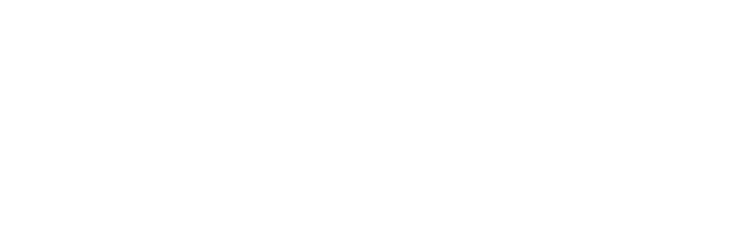

In [7]:
fig = plt.figure(figsize=(16,4))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in fake_img_list]
ani = animation.ArtistAnimation(fig, ims, interval=250, repeat_delay=1000, blit=False)
HTML(ani.to_jshtml())

In [ ]:
generate_images(netG)